In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
from PIL import  Image
%matplotlib inline
import itertools
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

## Loading Preprocessed Dataset

In [2]:
dataset = pd.read_csv('C:/Users/sabhn/OneDrive/Desktop/KBS/Weather Prediction/cleanfile1.csv')

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,01-01-2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48,ENE,...,2,5,26.6,33.4,No,0.0,No,2009,1,1
1,02-01-2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37,SSE,...,1,1,20.3,27.0,No,0.0,No,2009,1,2
2,04-01-2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46,NNE,...,1,6,28.7,34.9,No,0.0,No,2009,1,4
3,05-01-2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31,WNW,...,1,5,29.1,35.6,No,0.0,No,2009,1,5
4,06-01-2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35,NW,...,1,6,33.6,37.6,No,0.0,No,2009,1,6


## Extracting Needed Columns 

In [4]:
dataset = dataset[['MinTemp', 'MaxTemp', 'Evaporation',
        'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow']].reset_index(drop=True)

## change the data
## Risk_MM

## object 
## Date, Location, WindGustDir(object) , WindDir9am(object) , WindDir3pm(object), Year, Month, Day 

In [5]:
dataset.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,17.9,35.2,12.0,12.3,48,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,No
1,18.4,28.9,14.8,13.0,37,19,19,30,8,1012.9,1012.1,1,1,20.3,27.0,No
2,19.4,37.6,10.8,10.6,46,30,15,42,22,1012.3,1009.2,1,6,28.7,34.9,No
3,21.9,38.4,11.4,12.2,31,6,6,37,22,1012.7,1009.1,1,5,29.1,35.6,No
4,24.2,41.0,11.2,8.4,35,17,13,19,15,1010.7,1007.4,1,6,33.6,37.6,No


## Changing 'Rainfall Tommorrow' Column Values to Numeric

In [6]:
dataset.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)

In [7]:
dataset.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,17.9,35.2,12.0,12.3,48,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,0
1,18.4,28.9,14.8,13.0,37,19,19,30,8,1012.9,1012.1,1,1,20.3,27.0,0
2,19.4,37.6,10.8,10.6,46,30,15,42,22,1012.3,1009.2,1,6,28.7,34.9,0
3,21.9,38.4,11.4,12.2,31,6,6,37,22,1012.7,1009.1,1,5,29.1,35.6,0
4,24.2,41.0,11.2,8.4,35,17,13,19,15,1010.7,1007.4,1,6,33.6,37.6,0


# Baseline Model - Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [35]:
## Splitting Train and Test Data 
train,test = train_test_split(dataset,test_size = .25 ,random_state = 111)

In [36]:
#Separating columns
Id_col     = ['Date']
target_col = ["RainTomorrow"]

##Seperating Dependent and Independent Variables
cols    = [i for i in dataset.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     11056
           1       0.72      0.52      0.60      3049

   micro avg       0.85      0.85      0.85     14105
   macro avg       0.80      0.73      0.76     14105
weighted avg       0.84      0.85      0.84     14105

Accuracy   Score :  0.8516129032258064
Area Under Curve :  0.7308813736467414 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



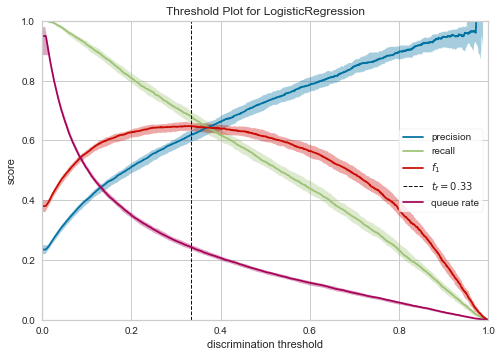

In [37]:
def rain_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification Report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area Under Curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not Rain","Rain"],
                        y = ["Not Rain","Rain"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot coeffs
    trace2 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Confusion Matrix','Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend=False, title="Model Performance" ,
                         autosize = False,height = 900,width = 600,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

rain_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

    

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     11056
           1       0.85      0.29      0.44      3049

   micro avg       0.84      0.84      0.84     14105
   macro avg       0.84      0.64      0.67     14105
weighted avg       0.84      0.84      0.80     14105

Accuracy   Score :  0.8357320099255583
Area Under Curve :  0.6395166335288693 

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



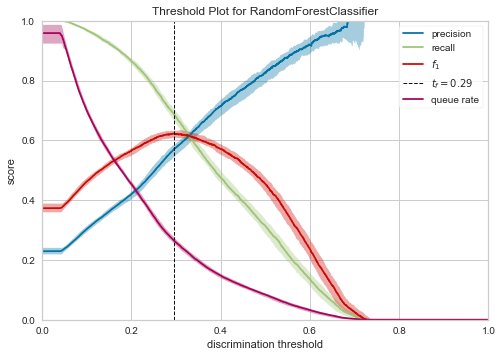

In [42]:
def randomforest(cols,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = dataset[cols + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in cols if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    #model performance
    if model_performance == True :
                 rain_prediction(rfc,
                                 rf_x,test_X,
                                 rf_y,test_Y,
                                 cols,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X if i not in target_col + Id_col] 
randomforest(cols1,100,99,3,"entropy",True)

# Model Performance

In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [44]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [45]:
#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "LogReg(Baseline)")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model2 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest")


In [46]:
#concat all models
model_performances = pd.concat([model1,model2],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,2))

py.iplot(table)

# Model Comparision

In [48]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","yellow")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"blue")
trace4  = output_tracer('f1_score',"white")

data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)